In [71]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams['font.size'] = 14

In [2]:
#Create Data 
slope = 2.0
intercept = -1.5

In [3]:
np.random.seed(42)
x = np.random.normal(0, 1, 500)

In [13]:
ytrue = slope*x + intercept + np.random.normal(0, 1, len(x))
ytrue

array([ 8.92783743e-01, -8.51894919e-01, -1.44992554e-01,  8.99122935e-01,
       -1.27008344e+00, -1.57478853e+00,  2.55361885e+00,  6.70041260e-01,
       -1.38939606e+00, -9.50115124e-01, -1.10944132e+00, -2.23385990e+00,
        1.05918542e+00, -6.01574831e+00, -3.21387186e+00, -2.42666428e+00,
       -4.17708024e+00, -1.35539117e+00, -3.63639546e+00, -3.90044146e+00,
        1.95413303e+00, -2.52525260e+00, -1.38929818e+00, -2.20722601e+00,
       -8.61222279e-01, -8.41831151e-01, -3.76398368e+00, -6.28572637e-01,
       -2.08775941e+00, -3.10618006e+00, -2.96078976e+00,  5.35972295e-01,
       -1.12777133e+00, -2.96822592e+00, -3.38096638e-01, -2.36770054e+00,
       -2.30803847e+00, -6.88371513e+00, -3.93192028e+00, -5.91792256e-02,
        1.66086085e+00, -1.61614770e+00, -6.52615731e-01, -2.14071586e+00,
       -4.62967128e+00, -2.05602848e+00, -1.76895466e+00, -9.62147705e-01,
        6.63776929e-01, -3.64598896e+00, -1.47739476e+00, -1.87436103e+00,
       -2.35981381e+00, -

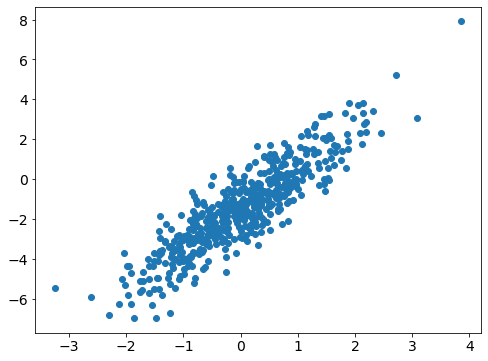

In [5]:
plt.scatter(x, ytrue)

In [7]:
#Create baseline model 
def make_line(x, w0, w1):  
    ypred = w0*x + w1
    return ypred

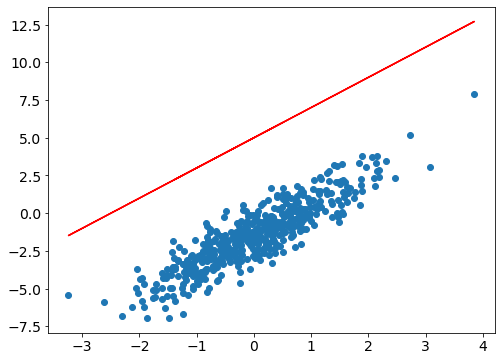

In [8]:
plt.scatter(x, ytrue)
plt.plot(x, make_line(x, 2, 5), 'r')

In [9]:
#Calculate Loss Function
def mse(ytrue, ypred):
    error = np.square(np.subtract(ytrue, ypred)).mean()
    return error

In [10]:
a = np.array([1.0, 1.2, 1.4, 1.6])
b = np.array([0.2, 0.4, 0.6, 0.8])

assert round(mse(a,b), 2) == 0.64

In [12]:
#Calculate the gradient 

def calc_gradient(x, ytrue, w0, w1):

    dw = 0.0001
    ypred = w0*x + w1

    '''tweak first parameter'''
    w1_change = w1 + dw
    # calculate predictions using w0 and w1_change
    ypred_w1 = w0*x + w1_change
    deriv_w1 = (mse(ytrue,ypred_w1) - mse(ytrue,ypred)) / dw

    '''tweak second parameter'''
    w0_change = w0 + dw
    # calculate predictions using w0_change and w1
    ypred_w0 = make_line(x, w0_change,w1)
    deriv_w0 = (mse(ytrue,ypred_w0) - mse(ytrue,ypred)) / dw

    return [deriv_w0, deriv_w1] # return both derivations as a list

In [47]:
#Implement gradient descent and check out for the output it's getting 

w0 = -1.0 # arbitrary starting value
w1 = 5.0 # arbitrary starting value
LR = 2 # choose a small learning rate
MAX_ITER = 500
THRESHOLD = 0.01 #level of change below which learning stops




In [77]:
for i in range(0,500): # for i in range(MAX_ITER):

    # 1. Calculate the gradient of the loss function with respect to each model parameter.    
    deriv_w0, deriv_w1 = calc_gradient(x, ytrue, w0, w1)

    # 2. If the gradient becomes really close to zero, break out of the loop.
    if ((abs(deriv_w0) <= THRESHOLD) and (abs(deriv_w1) <= THRESHOLD)):
        print(f"CONVERGED, ITERATION {i}")
        print(f"SLOPE: {w1}, INTERCEPT: {w0}")
        print(f"Derivatives & threshold: {deriv_w0}, {deriv_w1}, {THRESHOLD}")
        break

    # 3. For each model parameter,
    else:
    # - calculate the updated parameter value using the formula from above.
         w1_change = -LR*deriv_w1
         w0_change = -LR*deriv_w2
    # - overwrite the value with its updated value.  
         w1 = w1 + w1_change
         w0 = w0 + w0_change
        
    # 4. (Every 10th loop), print all variables to check if they are converging to their expected values.

    if i % 10 == 0:
        print(f"ITERATION: {i}")
        print(f"SLOPE: {w1}, derivative: {deriv_w1}")
        print(f"INTERCEPT: {w0}, derivative: {deriv_w0}")
        print("----")
        
        plt.scatter(x, ytrue)
        plt.plot(x, make_line(x, w0, w1), color='r')
        plt.show()

CONVERGED, ITERATION 0
SLOPE: 1538174310083.6304, INTERCEPT: -745038767.5484792
Derivatives & threshold: 0.0, 0.0, 0.01
